# Rancang Bangun Pengendali Otomatis Lingkungan Termal Berbasis Jaringan Saraf Tiruan

### Program Kecerdasan Buatan untuk membentuk model jaringan saraf tiruan dalam memenuhi Tugas Akhir program studi Teknik Fisika.

In [1]:
# Mengimpor pustaka yang dibutuhkan.

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# Memasukkan dataset ke dalam jupyter.
data = pd.read_excel('Data/dataAll.xlsx')

In [3]:
# # Mengubah tipe data waktu
# def ubahT(dt):
#     waktu = 60*int(dt.strftime('%H')) + int(dt.strftime('%M'))
#     return waktu

# data['Time'] = data['Time'].apply(ubahT)
# data['Time']

In [4]:
# # Mengubah data Month

# def ubahM(dt):
#     if dt == 'Mar':
#         return 3
#     elif dt == 'Jun':
#         return 6
#     elif dt == 'Sep':
#         return 9
#     elif dt == 'Des':
#         return 12

# data['Month'] = data['Month'].apply(ubahM)
# data['Month']

In [5]:
# Memisahkan data input dan data target.

# Data Input
X = data[['Heater','AC','DrybulbT','Radiation']]

# Data Target
target = data[['AirT','RH','No','Variation','Month','Time']]

In [6]:
# Memisahkan data pelatihan (training) dan data pengujian (testing).

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Memisahkan 20% menjadi data tes
X_temp, X_test, y_temp, y_test = train_test_split(X, target, test_size=0.2, shuffle=True, random_state=15)

# Memisahkan 20% menjadi data validation
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, shuffle=True, random_state=2019)

In [7]:
# Menghapus data temporary
del X_temp, y_temp

# print proportions
print('train: {}% | validation: {}% | test {}%'.format(round(len(y_train)/len(target)*100,2),
                                                       round(len(y_val)/len(target)*100,2),
                                                       round(len(y_test)/len(target)*100,2)))

train: 60.0% | validation: 20.0% | test 20.0%


In [8]:
# banyak data
print(X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape)

(14400, 4) (4800, 4) (4800, 4) (14400, 6) (4800, 6) (4800, 6)


## Model Tuning menggunakan Multi-Layer Perceptron Regressor

In [9]:
# Impor pustaka
from sklearn.neural_network import MLPRegressor

# list_neuron = [1,5,10,25,50,75,100]
list_neuron = range(1,21)

In [10]:
# # Mencari optimasi jumlah hidden layer dan neuron terbaik
# import operator

# def ann(m):
#     # Model MLP
#     return MLPRegressor(random_state = 1, activation = 'relu', hidden_layer_sizes=(m), solver='adam', alpha=0.001, max_iter = 5000)

# daftar = {}
# for i in list_neuron:
#     # Pelatihan model
#     model = ann(i)
#     model.fit(X_train, y_train[['AirT','RH']])
    
#     # Prediksi model
#     y_pred = model.predict(X_val)
#     y_pred = pd.DataFrame(y_pred, columns=['AirT','RH'])
    
#     # Menghitung nilai RMSE dan R^2 (Validasi)
#     rmse_AirT = round(mean_squared_error(y_val.AirT, y_pred.AirT)**0.5,2)
#     R2_AirT = round(r2_score(y_val.AirT, y_pred.AirT)*100,2)
    
#     key = str(i)
#     value = str(rmse_AirT) + ',' + str(R2_AirT)
#     daftar[key] = rmse_AirT
#     print(i,': ','RMSE =',rmse_AirT,', R^2 =',R2_AirT,'%')
#     if R2_AirT > 50 and rmse_AirT < 1:
#         neuron = {i}
#     else:
#         neuron = min(daftar.items(), key=operator.itemgetter(1))[0]

# print()
# print(neuron, daftar)  # 15 : RMSE = 1.04, R^2 = 82.61%

In [11]:
# lists = sorted(daftar.items())
# x, y = zip(*lists)

# plt.plot(x, y)
# plt.show()

In [12]:
# # Mencari optimasi jumlah hidden layer dan neuron terbaik
# import operator

# def ann(m,n):
#     # Model MLP
#     return MLPRegressor(random_state = 1, activation = 'relu', hidden_layer_sizes=(m,n), solver='adam', alpha=0.001, max_iter = 5000)

# daftar = {}
# for i in list_neuron:
#     for j in list_neuron:
#         # Pelatihan model
#         model = ann(i,j)
#         model.fit(X_train, y_train[['AirT','RH']])

#         # Prediksi model
#         y_pred = model.predict(X_val)
#         y_pred = pd.DataFrame(y_pred, columns=['AirT','RH'])

#         # Menghitung nilai RMSE dan R^2 (Validasi)
#         rmse = round(mean_squared_error(y_val.RH, y_pred.RH)**0.5,2)
#         R2 = round(r2_score(y_val.RH, y_pred.RH)*100,2)

#         key = str(i) + ',' + str(j)
#         value = str(rmse) + ',' + str(R2)
#         daftar[key] = rmse
#         print(i,j,': ','RMSE =',rmse,', R^2 =',R2)
#         if R2 > 50 and rmse < 1:
#             neuron = {i,j}
#         else:
#             neuron = min(daftar.items(), key=operator.itemgetter(1))[0]

# print()
# print(neuron, daftar)  # 6,14 : RMSE = 33,99

In [13]:
# alphas = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]
# print('Mencari nilai alpha terbaik')
# print('-'*76)
# for alpha in alphas:
#     # Pembuatan model
#     # model_mlp = MLPRegressor(random_state=1, activation='relu', hidden_layer_sizes=(24,24,24), solver='adam')
#     model_mlp = MLPRegressor(random_state = 1, activation = 'relu', hidden_layer_sizes=(20, 13), solver='adam', 
#                              alpha=alpha, max_iter = 5000)

#     # Melakukan pelatihan (training) menggunakan 'fit'
#     model_mlp.fit(X_train, y_train[['AirT','RH']])

#     # Prediksi model
#     y_pred = model_mlp.predict(X_val)
#     y_pred = pd.DataFrame(y_pred, columns=['AirT','RH'])
    
#     # Menghitung nilai RMSE dan R^2 (Testing)
#     rmse_AirT = round(mean_squared_error(y_val.AirT, y_pred.AirT)**0.5,2)
#     rmse_RH = round(mean_squared_error(y_val.RH, y_pred.RH)**0.5,2)
#     R2_AirT = round(r2_score(y_val.AirT, y_pred.AirT)*100,2)
#     R2_RH = round(r2_score(y_val.RH, y_pred.RH)*100,2)
    

#     # print errors as report
#     print('AirT: RMSE = {}, R^2 = {}%'.format(rmse_AirT,R2_AirT), end=' | ')
#     print('RH: RMSE = {}, R^2 {}% = | alpha: {}'.format(rmse_RH,R2_RH,alpha))

In [14]:
# Model final
model_mlp = MLPRegressor(random_state = 1, activation = 'relu', hidden_layer_sizes=(12,12,12), solver='lbfgs', 
                             alpha=0.001, max_iter = 5000)

# Melakukan pelatihan (training) menggunakan 'fit'
model_mlp.fit(X_train, y_train[['AirT','RH']])

# Prediksi model
y_pred = model_mlp.predict(X_test)
y_pred = pd.DataFrame(y_pred, columns=['AirT','RH'])

# Menghitung nilai RMSE dan R^2 (testing)
rmse_AirT = round(mean_squared_error(y_test.AirT, y_pred.AirT)**0.5,2)
rmse_RH = round(mean_squared_error(y_test.RH, y_pred.RH)**0.5,2)
R_AirT = round(r2_score(y_test.AirT, y_pred.AirT)**0.5*100,2)
R_RH = round(r2_score(y_test.RH, y_pred.RH)**0.5*100,2)

print('Testing')
print('AirT : RMSE = {} | R = {}%'.format(rmse_AirT,R_AirT))
print('RH   : RMSE = {} | R = {}%'.format(rmse_RH,R_RH))

Testing
AirT : RMSE = 1.42 | R = 81.71%
RH   : RMSE = 8.89 | R = 53.59%


In [15]:
print(model_mlp.get_params)

<bound method BaseEstimator.get_params of MLPRegressor(activation='relu', alpha=0.001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(12, 12, 12), learning_rate='constant',
             learning_rate_init=0.001, max_iter=5000, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)>


In [16]:
# Menambahkan fitur No Variation Month dan Time pada hasil prediksi
y_pred.index = y_test.index
y_pred[['No']] = y_test[['No']]
y_pred[['Variation']] = y_test[['Variation']]
y_pred[['Month']] = y_test[['Month']]
y_pred[['Time']] = y_test[['Time']]
y_pred

,AirT,RH,No,Variation,Month,Time
3257,20.681980,95.666242,3258,DT014,Jun,13:45:00
20006,25.916510,87.560934,20007,DT084,Des,08:39:00
2969,20.721410,103.524921,2970,DT013,Mar,08:57:00
20123,25.650197,90.417959,20124,DT084,Des,20:21:00
2733,20.881133,105.585216,2734,DT012,Des,09:21:00
...,...,...,...,...,...,...
17341,24.818849,89.066425,17342,DT073,Mar,06:09:00
15977,25.492041,80.660427,15978,DT067,Sep,13:45:00
15509,25.627931,84.634054,15510,DT065,Mar,14:57:00
14559,25.018053,86.501653,14560,DT061,Mar,15:57:00


## Visualisasi

In [17]:
# Variabel untuk pembuatan grafik

Heater    = X_test['Heater']
AC        = X_test['AC']
DrybulbT  = X_test['DrybulbT']
Radiation = X_test['Radiation']
AirT      = y_test['AirT']
RH        = y_test['RH']

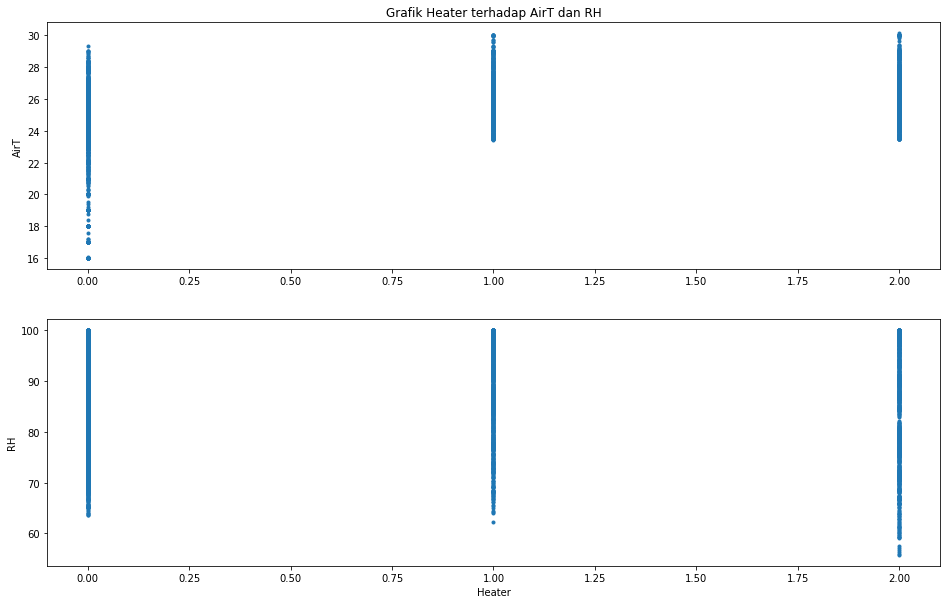

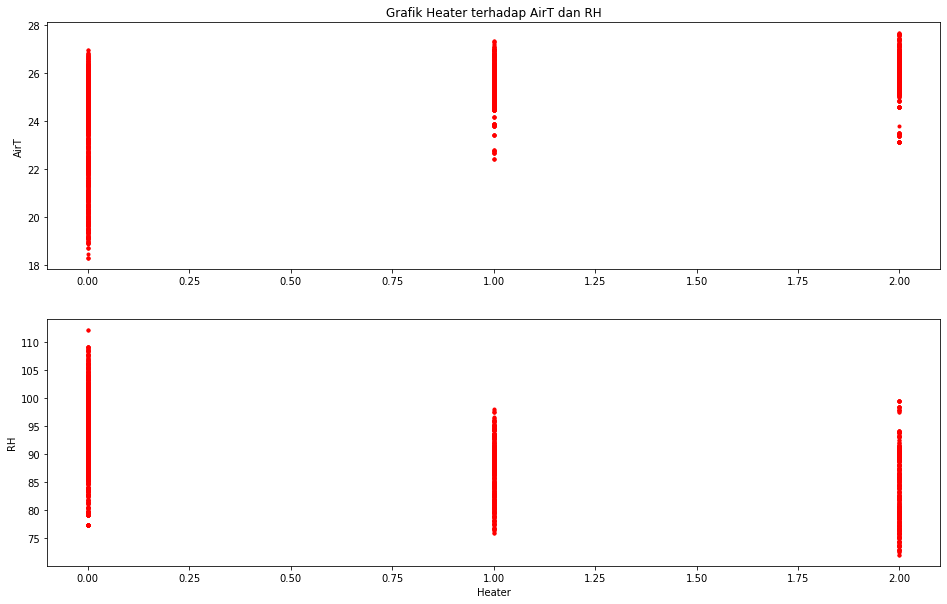

In [18]:
# plot a line, a perfit predict would all fall on this line
plt.figure(figsize=(16,10))

plt.subplot(2, 1, 1)
plt.title('Grafik Heater terhadap AirT dan RH')
plt.plot(Heater, AirT, '.')
plt.ylabel('AirT')

plt.subplot(2, 1, 2)
plt.plot(Heater, RH, '.')
plt.xlabel('Heater')
plt.ylabel('RH')

plt.show()

plt.figure(figsize=(16,10))

plt.subplot(2, 1, 1)
plt.title('Grafik Heater terhadap AirT dan RH')
plt.plot(Heater, y_pred.AirT, 'r.')
plt.ylabel('AirT')

plt.subplot(2, 1, 2)
plt.plot(Heater, y_pred.RH, 'r.')
plt.xlabel('Heater')
plt.ylabel('RH')

plt.show()

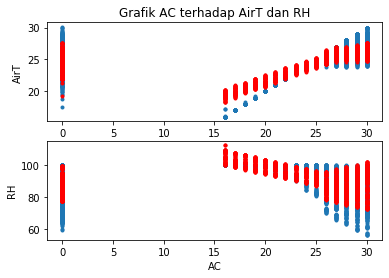

In [19]:
plt.subplot(2, 1, 1)
plt.title('Grafik AC terhadap AirT dan RH')
plt.plot(AC, AirT, '.')
plt.plot(AC, y_pred.AirT, 'r.')
plt.ylabel('AirT')

plt.subplot(2, 1, 2)
plt.plot(AC, RH, '.')
plt.plot(AC, y_pred.RH, 'r.')
plt.xlabel('AC')
plt.ylabel('RH')

plt.show()

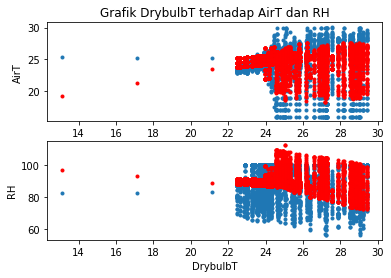

In [20]:
plt.subplot(2, 1, 1)
plt.title('Grafik DrybulbT terhadap AirT dan RH')
plt.plot(DrybulbT, AirT, '.')
plt.plot(DrybulbT, y_pred.AirT, 'r.')
plt.ylabel('AirT')

plt.subplot(2, 1, 2)
plt.plot(DrybulbT, RH, '.')
plt.plot(DrybulbT, y_pred.RH, 'r.')
plt.xlabel('DrybulbT')
plt.ylabel('RH')

plt.show()

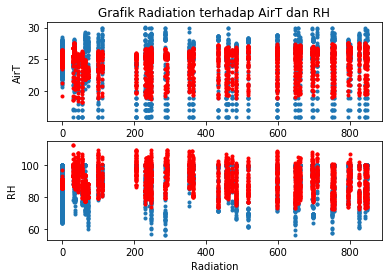

In [21]:
plt.subplot(2, 1, 1)
plt.title('Grafik Radiation terhadap AirT dan RH')
plt.plot(Radiation, AirT, '.')
plt.plot(Radiation, y_pred.AirT, 'r.')
plt.ylabel('AirT')

plt.subplot(2, 1, 2)
plt.plot(Radiation, RH, '.')
plt.plot(Radiation, y_pred.RH, 'r.')
plt.xlabel('Radiation')
plt.ylabel('RH')

plt.show()

## Visualisation in Time variance

Variasi: DT014


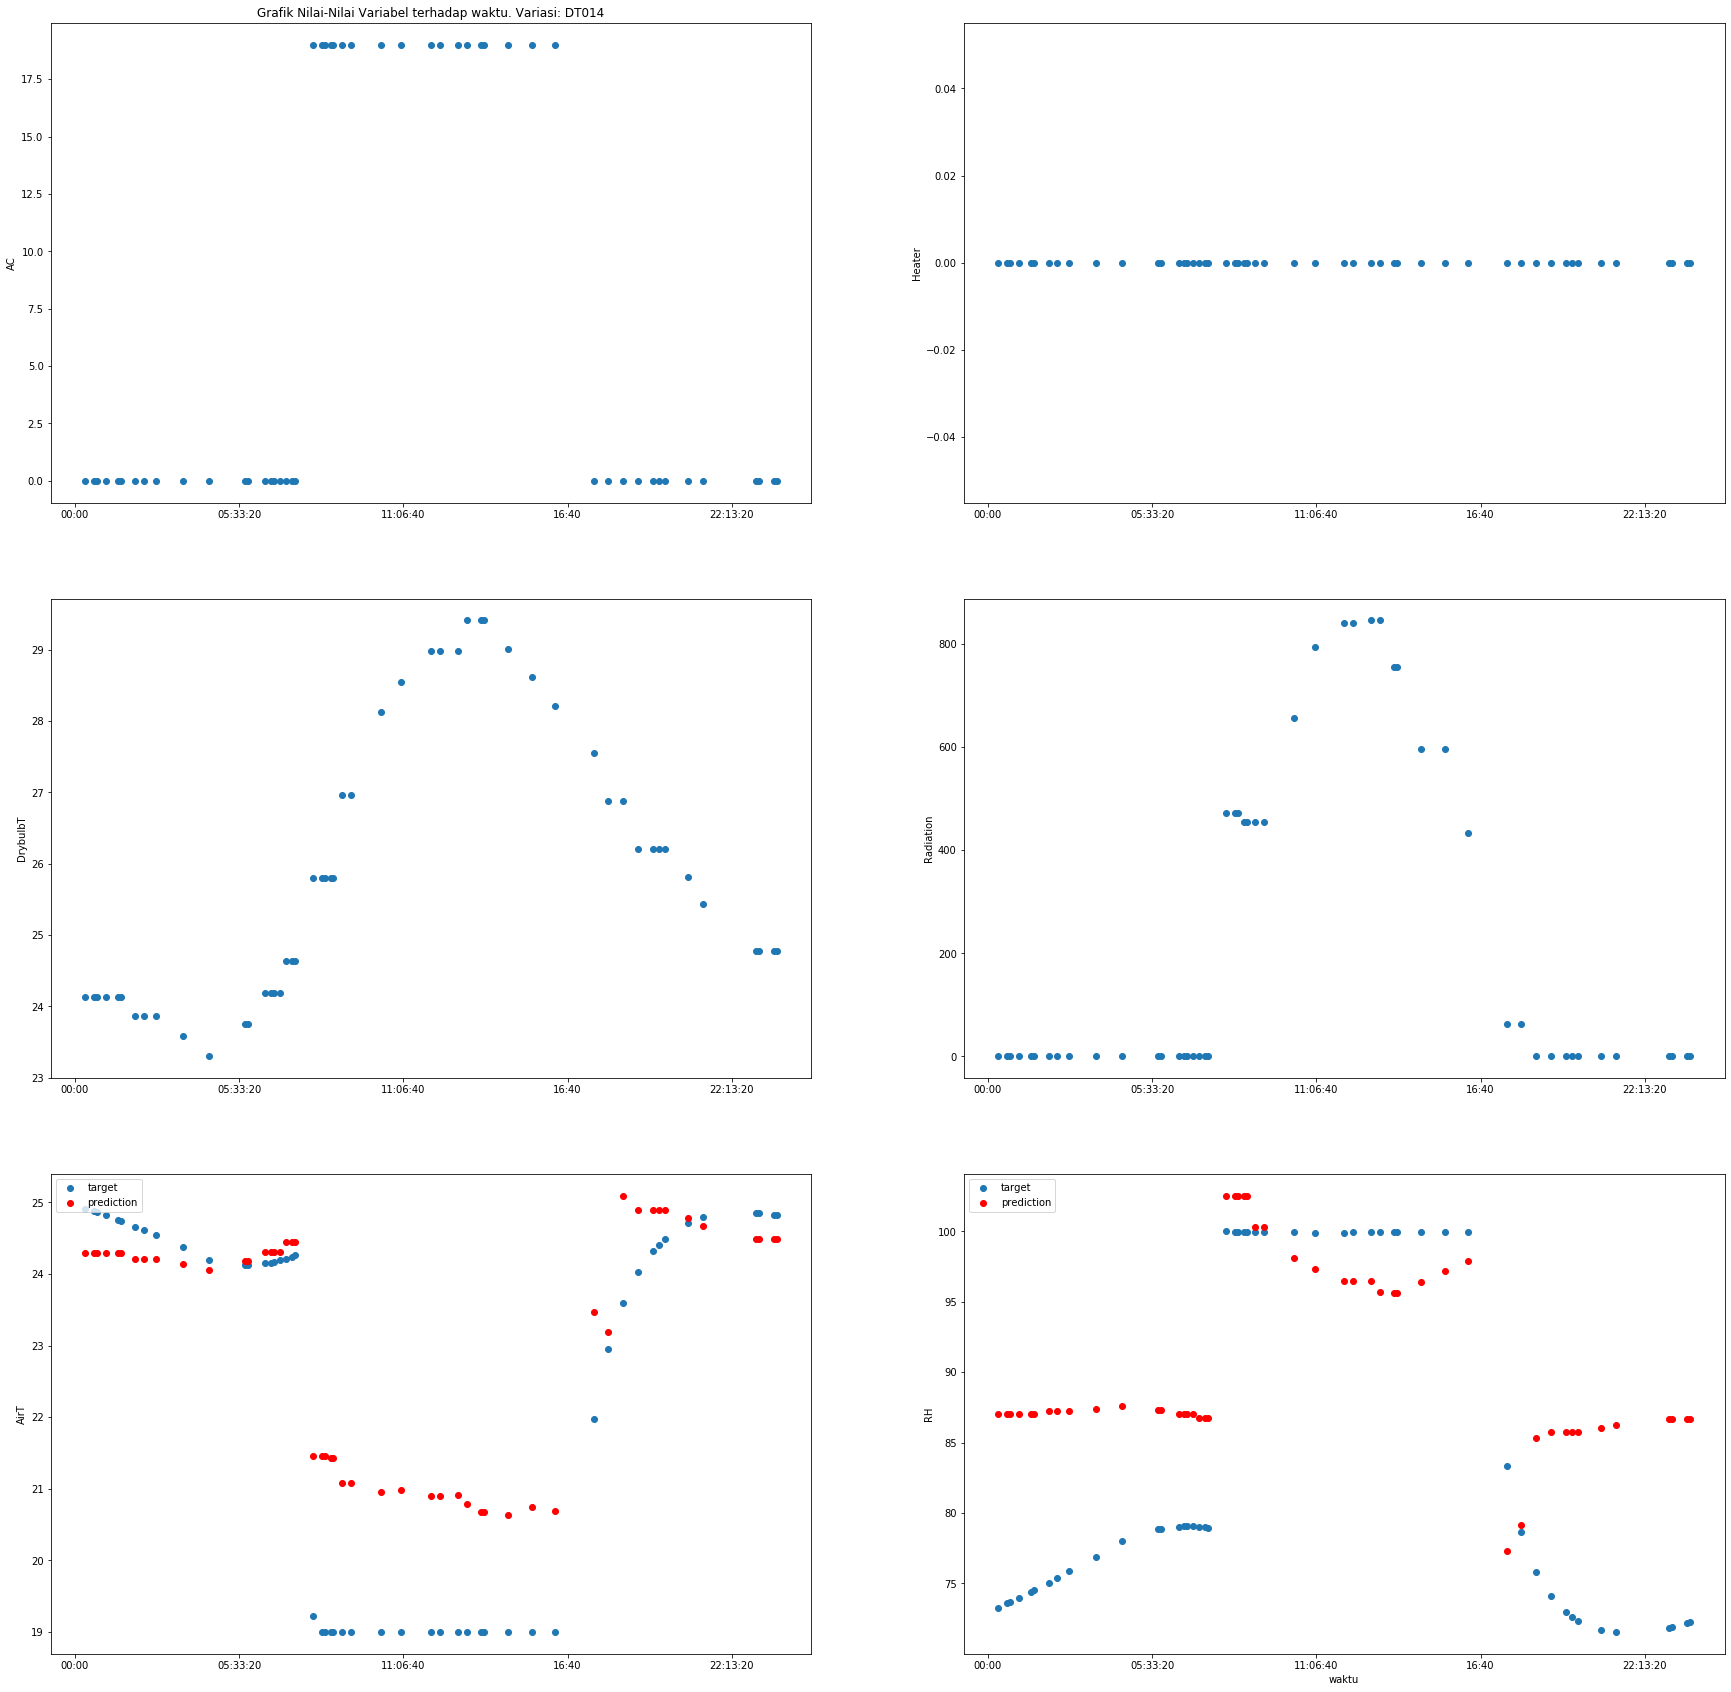

______________________________________________________________________________________________________________

Variasi: DT084


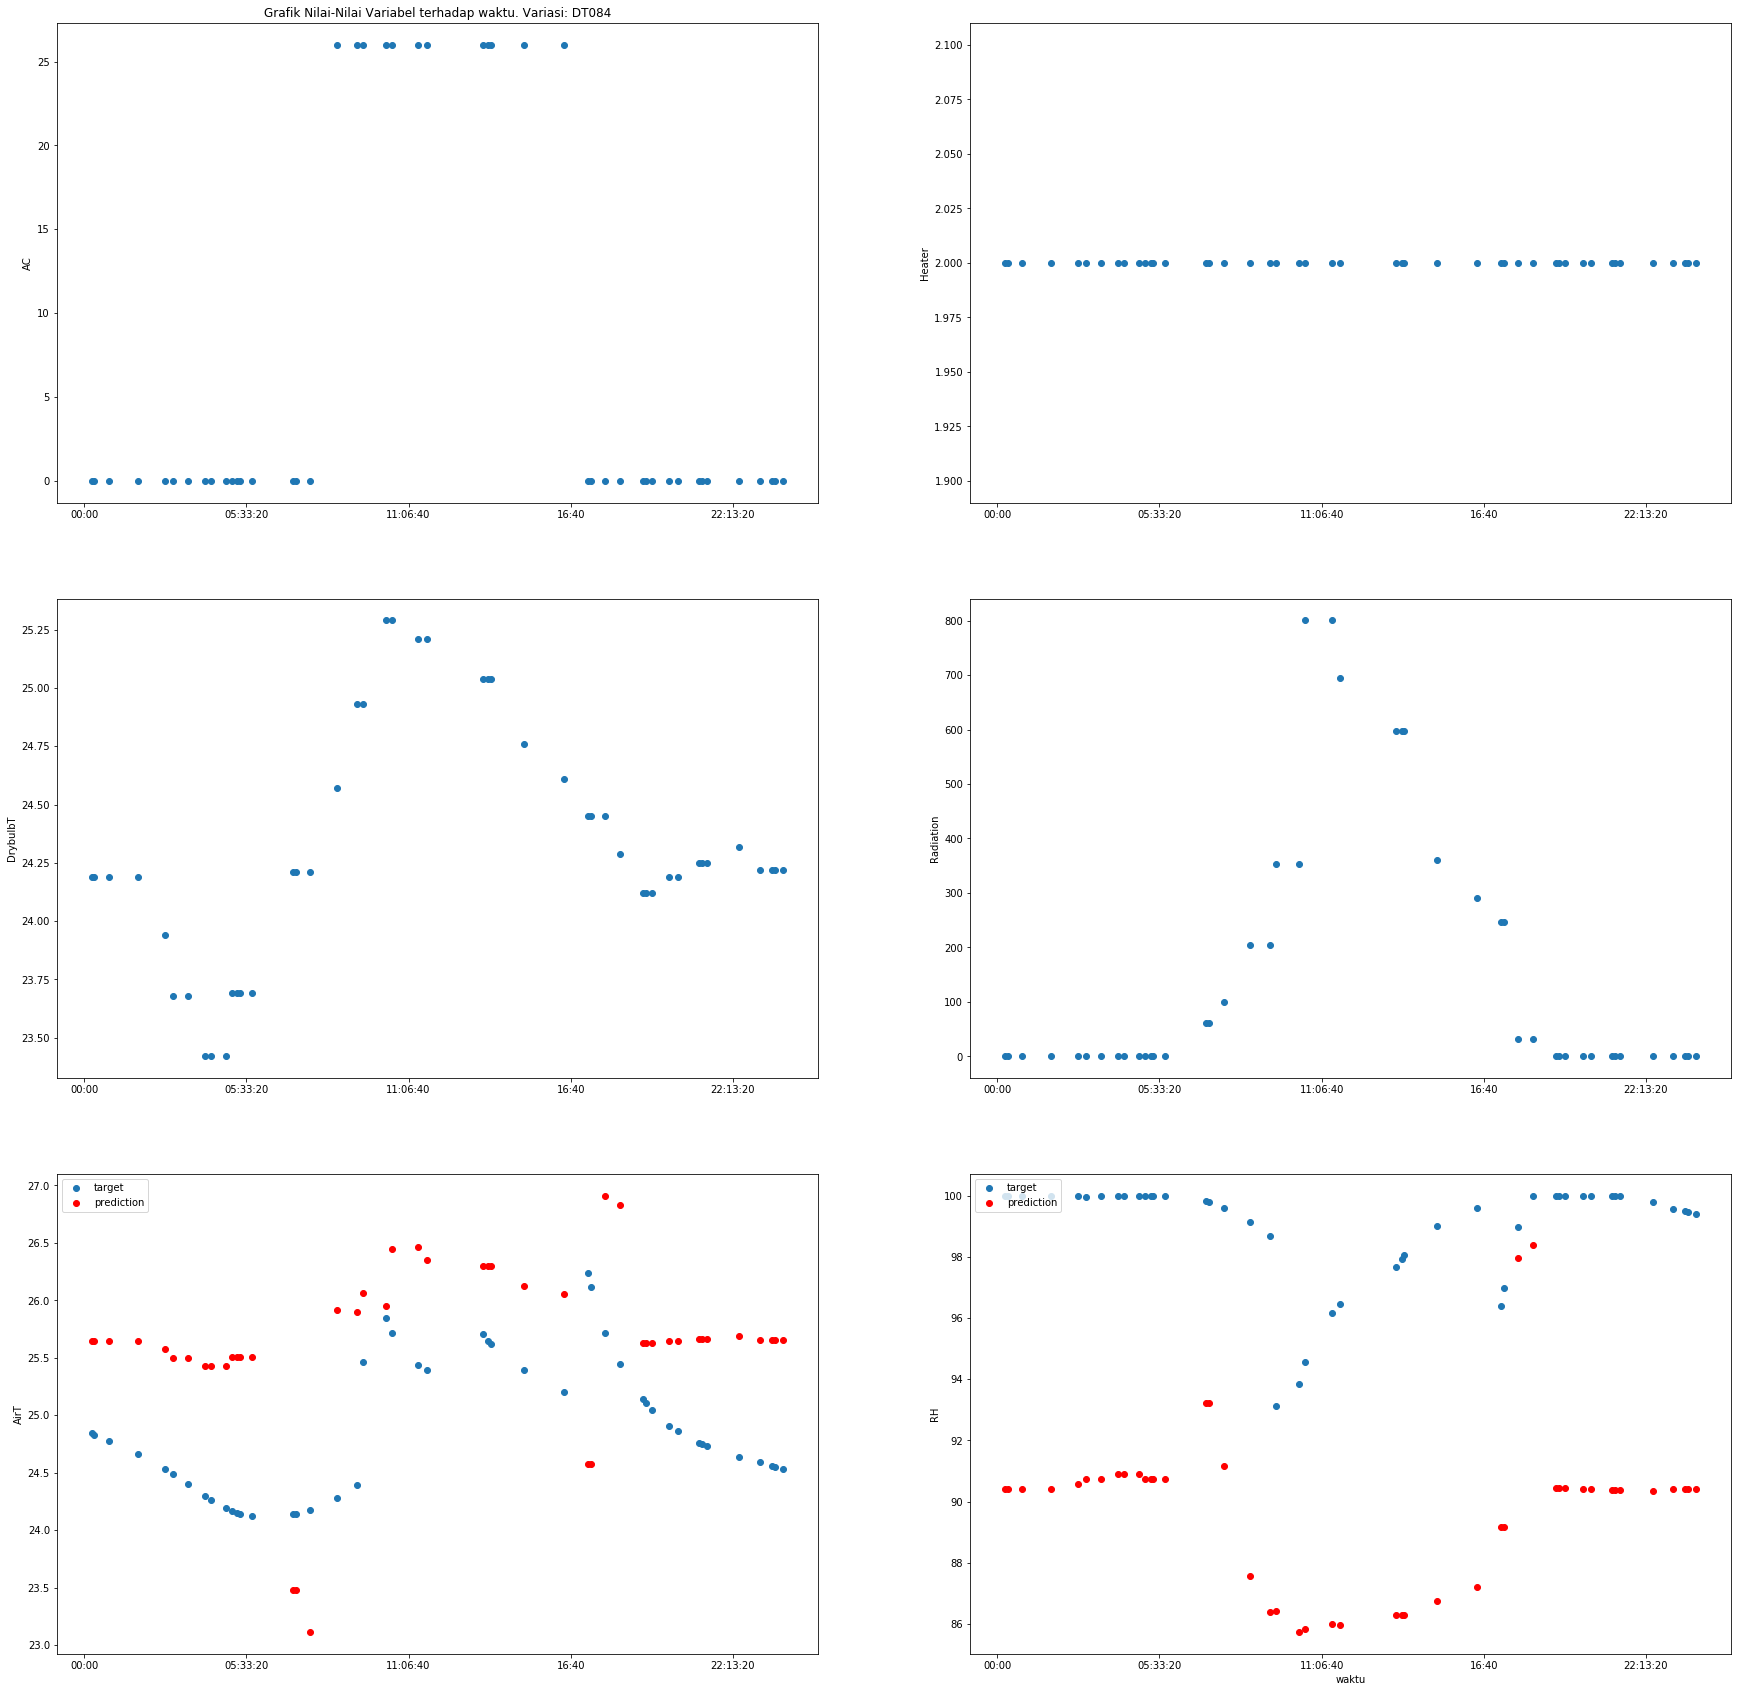

______________________________________________________________________________________________________________

Variasi: DT013


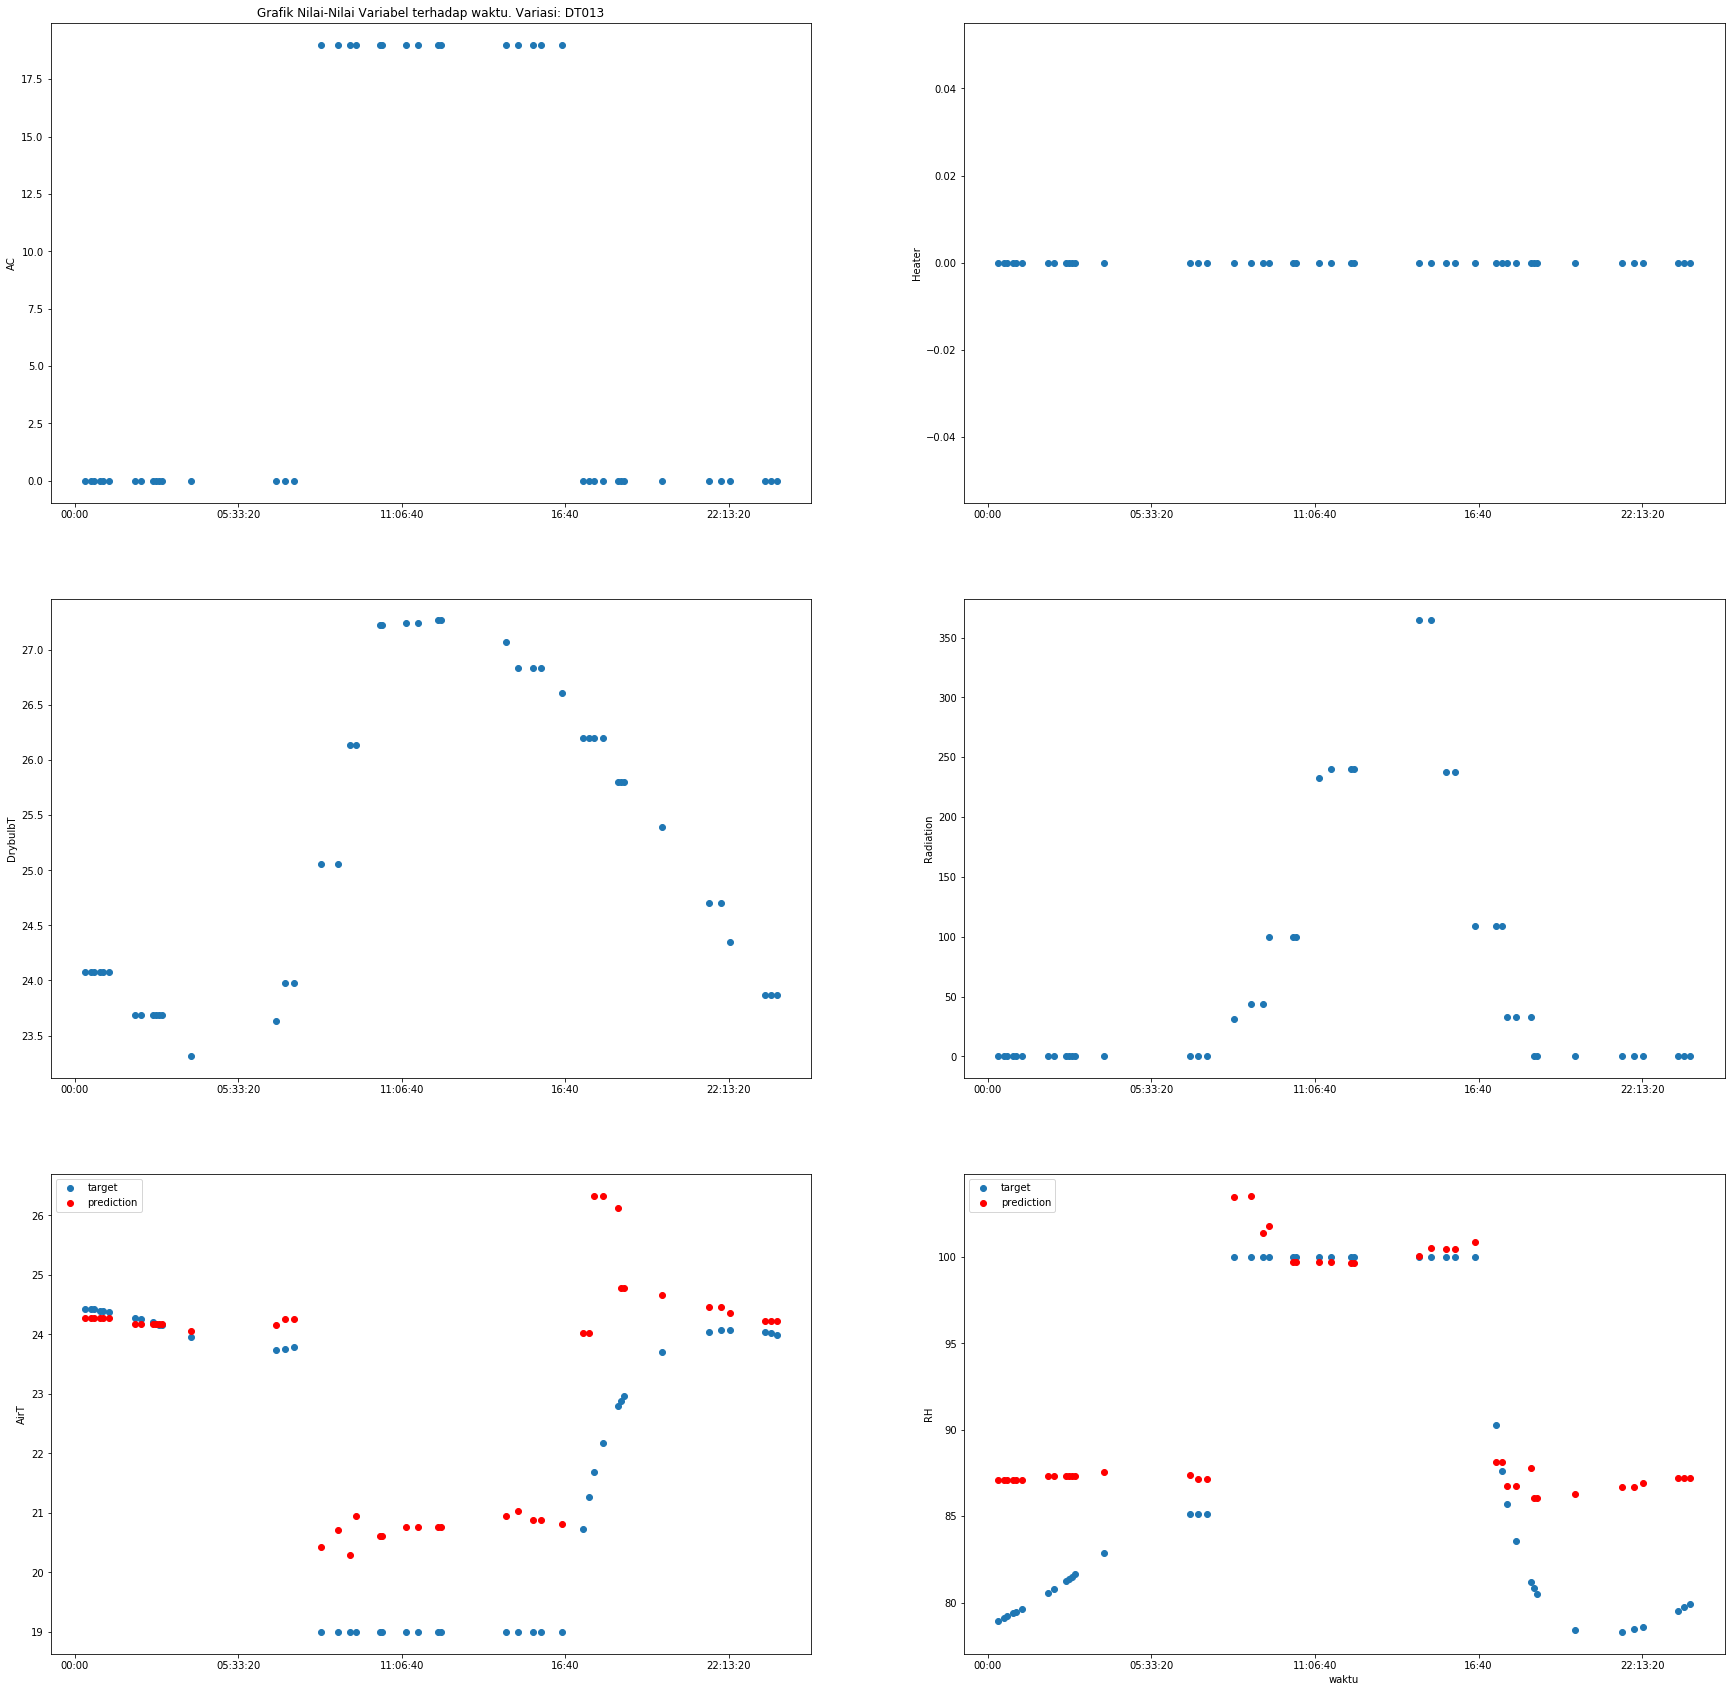

______________________________________________________________________________________________________________



In [22]:
i = 0
for v in y_test.Variation.unique():
    print('Variasi:', v)
    
    x1  = y_test.loc[y_test['Variation']==v].Time
    
    y1  = X_test.loc[y_test['Variation']==v].AC
    y2  = X_test.loc[y_test['Variation']==v].Heater
    y3  = X_test.loc[y_test['Variation']==v].DrybulbT
    y4  = X_test.loc[y_test['Variation']==v].Radiation
    y5a = y_test.loc[y_test['Variation']==v].AirT
    y5b = y_pred.loc[y_pred['Variation']==v].AirT
    y6a = y_test.loc[y_test['Variation']==v].RH
    y6b = y_pred.loc[y_pred['Variation']==v].RH
    
    plt.subplots(figsize=(30,30))
    
    plt.subplot(3,2,1)
    plt.title('Grafik Nilai-Nilai Variabel terhadap waktu. Variasi: ' + str(v))
    plt.plot(x1, y1, 'o')
    plt.xlabel(None)
    plt.ylabel('AC')
    
    plt.subplot(3,2,2)
    plt.plot(x1, y2, 'o')
    plt.xlabel(None)
    plt.ylabel('Heater')
    
    plt.subplot(3,2,3)
    plt.plot(x1, y3, 'o')
    plt.xlabel(None)
    plt.ylabel('DrybulbT')
    
    plt.subplot(3,2,4)
    plt.plot(x1, y4, 'o')
    plt.xlabel(None)
    plt.ylabel('Radiation')
    
    plt.subplot(3,2,5)
    plt.plot(x1, y5a, 'o', label='target')
    plt.plot(x1, y5b, 'ro', label='prediction')
    plt.xlabel(None)
    plt.ylabel('AirT')
    plt.legend(loc = 'upper left')
    
    plt.subplot(3,2,6)
    plt.plot(x1, y6a, 'o', label='target')
    plt.plot(x1, y6b, 'ro', label='prediction')
    plt.xlabel('waktu')
    plt.ylabel('RH')
    plt.legend(loc = 'upper left')
    
    plt.show()
    
    print('_'*110)
    print()
    
    i+=1
    if i == 3:
        break